Attempting to load file from: C:\Users\vishw\Downloads\archive (3)\AB_NYC_2019.csv
Initial dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  i

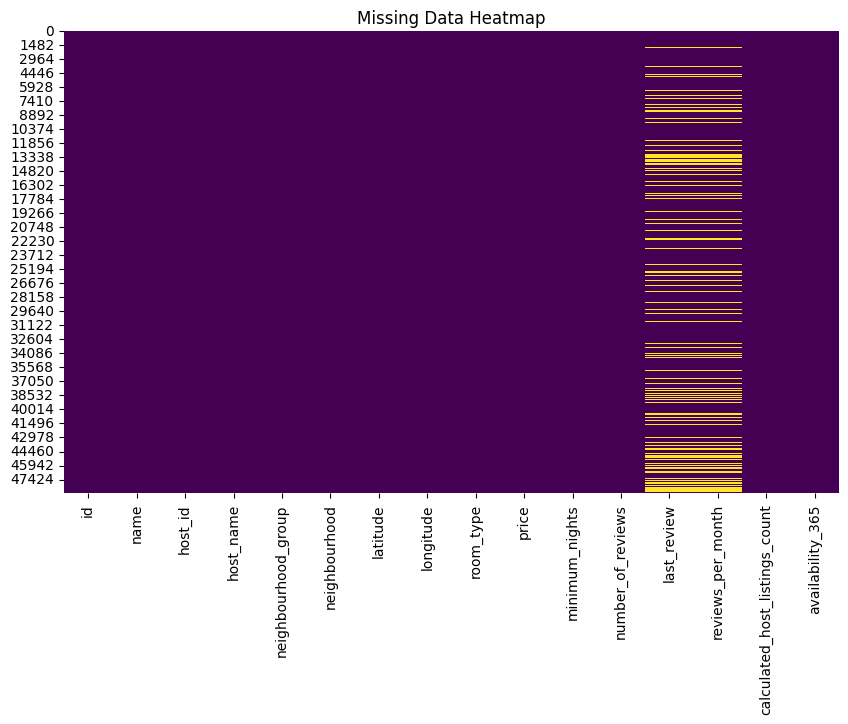

C:\Users\vishw\AppData\Local\Temp\ipykernel_10460\2457913414.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\vishw\AppData\Local\Temp\ipykernel_10460\2457913414.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

After Imputation:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
Data cleaning complete. Cleaned data saved to: C:\Users\vishw\Downloads\archive (3)\cleaned_AB_NYC_2019.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
file_path = r'C:\Users\vishw\Downloads\archive (3)\AB_NYC_2019.csv'  # Raw string notation to handle backslashes
print(f"Attempting to load file from: {file_path}")

try:
    df = pd.read_csv(file_path)
    print("Initial dataset info:")
    print(df.info())
    
    # Identify Missing Values
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values)
    
    # Visualize Missing Values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
    
    # Handle Missing Values
    # Impute numerical columns with the mean
    numerical_columns = df.select_dtypes(include=['number']).columns
    for column in numerical_columns:
        df[column].fillna(df[column].mean(), inplace=True)
    
    # Impute categorical columns with the mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    print("After Imputation:\n", df.isnull().sum())
    
    # Alternatively, you can remove rows with missing values
    # df.dropna(inplace=True)
    
    # Alternatively, you can remove columns with missing values
    # df.dropna(axis=1, inplace=True)

    # Custom Imputation Example
    # df['price'] = df.groupby('neighbourhood_group')['price'].transform(lambda x: x.fillna(x.median()))
    # print("After Custom Imputation:\n", df.isnull().sum())

    # Save Cleaned Data
    cleaned_file_path = r'C:\Users\vishw\Downloads\archive (3)\cleaned_AB_NYC_2019.csv'
    df.to_csv(cleaned_file_path, index=False)

    print("Data cleaning complete. Cleaned data saved to:", cleaned_file_path)

except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path and try again.")
except ValueError as ve:
    print(f"ValueError: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")

